In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
cd /content/gdrive/My Drive/Colab Notebooks/Adopt A Buddy Challenge/

/content/gdrive/My Drive/Colab Notebooks/Adopt A Buddy Challenge


In [5]:
import numpy as np
import pandas as pd
import datetime as dt

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

In [5]:
!pip3 install setuptools wheel numpy scipy scikit-learn -U

     |████████████████████████████████| 808kB 8.4MB/s 
     |████████████████████████████████| 14.5MB 235kB/s 
     |████████████████████████████████| 25.9MB 92kB/s 
     |████████████████████████████████| 6.8MB 48.7MB/s 
ERROR: tensorflow 2.3.0 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.1 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement scipy==1.4.1, but you'll have scipy 1.5.2 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: setuptools 49.2.0
    Uninstalling setuptools-49.2.0:
      Successfully uninstalled setuptools-49.2.0
  Found existing installation: wheel 0.34.2
    Uninstalling wheel-0.34.2:
      Successfully uninstalled wheel-0.34.2
  Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
  

In [7]:
train = pd.read_csv("Features_Train.csv")

In [8]:
train.head()

,pet_id,condition,color_type,length(m),height(cm),X1,X2,time_difference_hours,breed_category,pet_category
0,ANSL_69903,2.00000,18,0.80,7.78,13,9,1768.416667,0.0,1
1,ANSL_66892,1.00000,53,0.72,14.19,13,9,44705.783333,0.0,2
2,ANSL_69750,0.88339,15,0.15,40.90,15,4,18056.400000,2.0,4
3,ANSL_71623,1.00000,53,0.62,17.82,0,1,18138.500000,0.0,2
4,ANSL_57969,2.00000,2,0.50,11.06,18,4,1257.633333,0.0,1


In [9]:
test = pd.read_csv("Features_Test.csv")

In [10]:
test.head()

,pet_id,condition,color_type,length(m),height(cm),X1,X2,time_difference_hours
0,ANSL_75005,0.0,2,0.87,42.73,0,7,105711.583333
1,ANSL_76663,1.0,36,0.06,6.71,0,1,4193.400000
2,ANSL_58259,1.0,2,0.24,41.21,0,7,47992.850000
3,ANSL_67171,1.0,2,0.29,8.46,7,1,27559.416667
4,ANSL_72871,1.0,14,0.71,30.92,0,7,11125.700000


In [11]:
breed = train["breed_category"]
pet = train["pet_category"]

In [12]:
train = train.drop("breed_category", axis = 1)
train = train.drop("pet_category", axis = 1)

In [13]:
train.describe()

,condition,color_type,length(m),height(cm),X1,X2,time_difference_hours
count,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000,18834.000000
mean,0.883390,24.560529,0.502636,27.448832,5.369598,4.577307,20542.027298
std,0.739606,19.432010,0.288705,13.019781,6.572366,3.517763,26320.034749
min,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,-1806.983333
25%,0.000000,4.000000,0.250000,16.172500,0.000000,1.000000,2874.716667
50%,1.000000,18.000000,0.500000,27.340000,0.000000,4.000000,9426.433333
75%,1.000000,48.000000,0.760000,38.890000,13.000000,9.000000,26817.000000
max,2.000000,55.000000,1.000000,50.000000,19.000000,9.000000,193359.800000


In [14]:
test.describe()

,condition,color_type,length(m),height(cm),X1,X2,time_difference_hours
count,8072.000000,8072.000000,8072.000000,8072.000000,8072.000000,8072.000000,8072.000000
mean,0.886623,23.226462,0.507265,27.451163,5.254336,4.505327,20560.033271
std,0.740796,18.602687,0.289615,12.917903,6.505841,3.523568,26488.450069
min,0.000000,0.000000,0.000000,5.010000,0.000000,0.000000,489.433333
25%,0.000000,5.000000,0.260000,16.277500,0.000000,1.000000,2941.245833
50%,1.000000,17.000000,0.510000,27.410000,0.000000,4.000000,9444.183333
75%,1.000000,46.000000,0.760000,38.480000,13.000000,9.000000,26798.350000
max,2.000000,53.000000,1.000000,49.990000,18.000000,9.000000,219696.000000


In [15]:
train = train.drop(["pet_id"], axis = 1)
test = test.drop(["pet_id"], axis = 1)

In [16]:
from sklearn.model_selection import train_test_split

# Splitting training data into train and validation set
X_train_breed, X_valid_breed, Y_train_breed, Y_valid_breed = train_test_split(train, breed, test_size = 0.2, random_state = 0)

In [17]:
parameters_breed={'learning_rate':0.001, 'boosting_type':'dart', 'objective':'multiclass', 'metric':'multi_logloss',
            'max_depth':10, 'xgboost_dart_mode': True, 'num_class':len(breed.unique())}
list_columns = [i for i in train.columns]

In [18]:
import lightgbm as lgb
lg_train_breed = lgb.Dataset(X_train_breed, label=Y_train_breed, feature_name=list_columns)
lg_valid_breed = lgb.Dataset(X_valid_breed, label=Y_valid_breed, reference = lg_train_breed, feature_name=list_columns)

In [19]:
model_breed = lgb.train(parameters_breed, lg_train_breed, num_boost_round = 20000, valid_sets=[lg_valid_breed], early_stopping_rounds=200, verbose_eval=50)

[50]	valid_0's multi_logloss: 0.87337
[100]	valid_0's multi_logloss: 0.844222
[150]	valid_0's multi_logloss: 0.818413
[200]	valid_0's multi_logloss: 0.790677
[250]	valid_0's multi_logloss: 0.769114
[300]	valid_0's multi_logloss: 0.743717
[350]	valid_0's multi_logloss: 0.726879
[400]	valid_0's multi_logloss: 0.706218
[450]	valid_0's multi_logloss: 0.680274
[500]	valid_0's multi_logloss: 0.665922
[550]	valid_0's multi_logloss: 0.650154
[600]	valid_0's multi_logloss: 0.638133
[650]	valid_0's multi_logloss: 0.622878
[700]	valid_0's multi_logloss: 0.609967
[750]	valid_0's multi_logloss: 0.595826
[800]	valid_0's multi_logloss: 0.580635
[850]	valid_0's multi_logloss: 0.567621
[900]	valid_0's multi_logloss: 0.552632
[950]	valid_0's multi_logloss: 0.540643
[1000]	valid_0's multi_logloss: 0.527282
[1050]	valid_0's multi_logloss: 0.514046
[1100]	valid_0's multi_logloss: 0.504278
[1150]	valid_0's multi_logloss: 0.494813
[1200]	valid_0's multi_logloss: 0.485253
[1250]	valid_0's multi_logloss: 0.475

condition 150986
color_type 341625
length(m) 278923
height(cm) 402392
X1 96688
X2 57390
time_difference_hours 471905


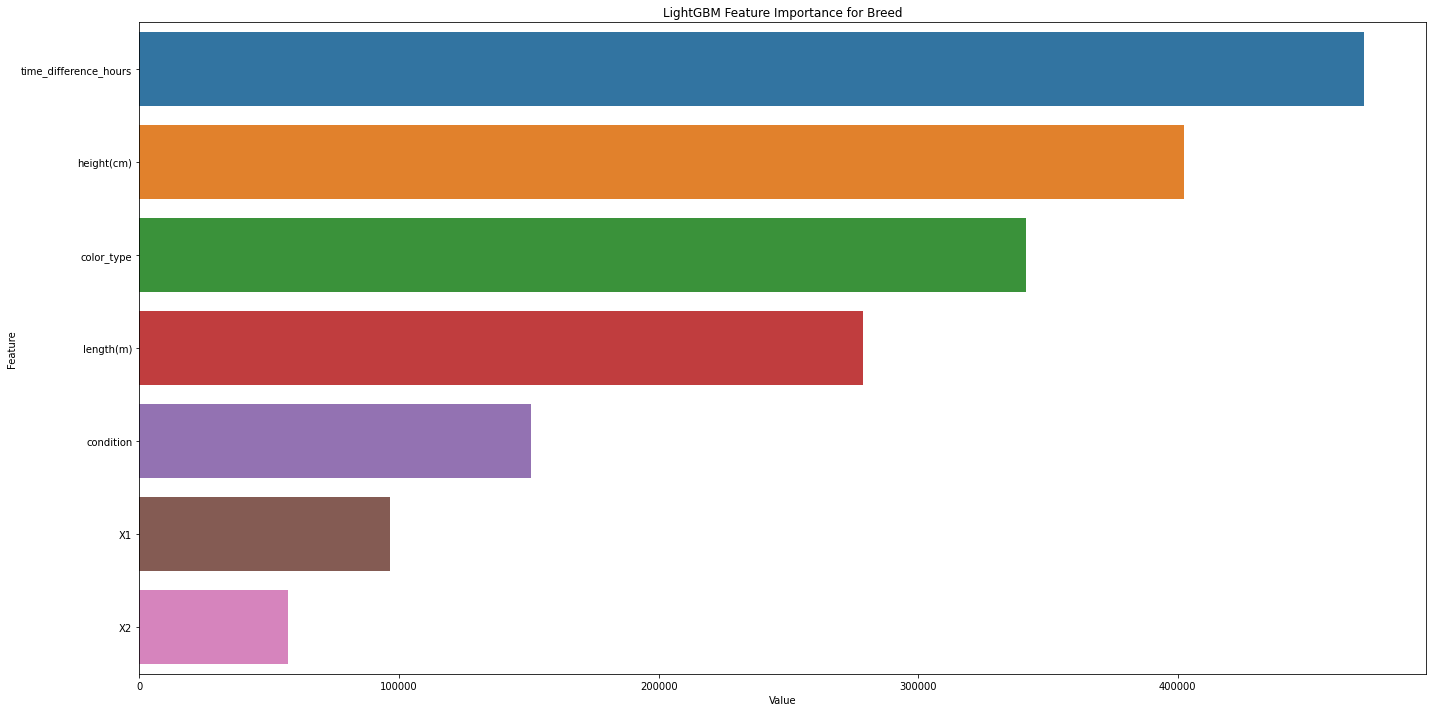

In [20]:
imps = model_breed.feature_importance()
names = model_breed.feature_name()
for fimp, fname in enumerate(names):
  print(fname, imps[fimp])
feature_imp_breed = pd.DataFrame(sorted(zip(model_breed.feature_importance(),list_columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp_breed.sort_values(by="Value", ascending=False))
plt.title('LightGBM Feature Importance for Breed')
plt.tight_layout()
plt.show()

In [21]:
from sklearn.metrics import f1_score

#Valid_Breed = lgb.Dataset(X_valid_breed)
Y_valid_pred_breed = model_breed.predict(X_valid_breed, num_iteration=model_breed.best_iteration)
Y_valid_pred_breed = [np.argmax(v) for v in Y_valid_pred_breed]

print(f1_score(Y_valid_breed, Y_valid_pred_breed, average = 'macro'))

0.9286043103282348


In [22]:
pet.unique()

array([1, 2, 4, 0])

In [23]:
pet = pet.map({2: 2, 1: 1, 0: 0, 4: 3})
pet.unique()

array([1, 2, 3, 0])

In [24]:
from sklearn.model_selection import train_test_split

# Splitting training data into train and validation set
X_train_pet, X_valid_pet, Y_train_pet, Y_valid_pet = train_test_split(train, pet, test_size = 0.2, random_state = 0)

In [25]:
parameters_pet={'learning_rate':0.001, 'boosting_type':'dart', 'objective':'multiclass', 'metric':'multi_logloss',
            'max_depth':10, 'xgboost_dart_mode': True, 'num_class':len(pet.unique())}
list_columns = [i for i in train.columns]

In [26]:
lg_train_pet = lgb.Dataset(X_train_pet, label=Y_train_pet, feature_name=list_columns)
lg_valid_pet = lgb.Dataset(X_valid_pet, label=Y_valid_pet, reference = lg_train_pet, feature_name=list_columns)

In [27]:
model_pet = lgb.train(parameters_pet, lg_train_pet, num_boost_round = 20000, valid_sets=[lg_valid_pet], early_stopping_rounds=200, verbose_eval=50)

[50]	valid_0's multi_logloss: 0.819406
[100]	valid_0's multi_logloss: 0.797342
[150]	valid_0's multi_logloss: 0.777937
[200]	valid_0's multi_logloss: 0.757318
[250]	valid_0's multi_logloss: 0.741323
[300]	valid_0's multi_logloss: 0.72255
[350]	valid_0's multi_logloss: 0.710119
[400]	valid_0's multi_logloss: 0.694866
[450]	valid_0's multi_logloss: 0.676219
[500]	valid_0's multi_logloss: 0.666076
[550]	valid_0's multi_logloss: 0.654988
[600]	valid_0's multi_logloss: 0.646505
[650]	valid_0's multi_logloss: 0.635747
[700]	valid_0's multi_logloss: 0.626644
[750]	valid_0's multi_logloss: 0.616735
[800]	valid_0's multi_logloss: 0.6061
[850]	valid_0's multi_logloss: 0.596942
[900]	valid_0's multi_logloss: 0.586423
[950]	valid_0's multi_logloss: 0.578005
[1000]	valid_0's multi_logloss: 0.568628
[1050]	valid_0's multi_logloss: 0.559354
[1100]	valid_0's multi_logloss: 0.552481
[1150]	valid_0's multi_logloss: 0.545803
[1200]	valid_0's multi_logloss: 0.539089
[1250]	valid_0's multi_logloss: 0.53259

condition 150986
color_type 341625
length(m) 278923
height(cm) 402392
X1 96688
X2 57390
time_difference_hours 471905


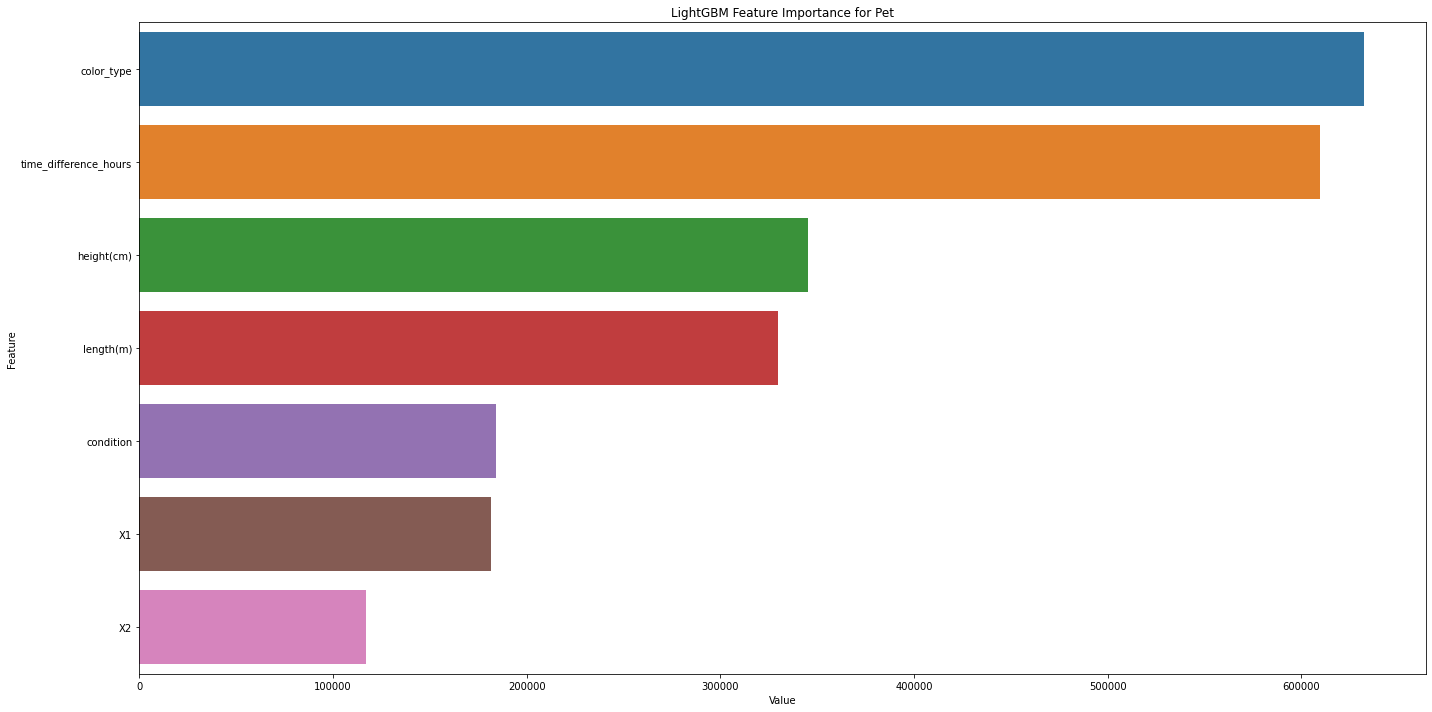

In [28]:
imps_pet = model_pet.feature_importance()
names_pet = model_pet.feature_name()
for fimp, fname in enumerate(names_pet):
  print(fname, imps[fimp])

feature_imp_pet = pd.DataFrame(sorted(zip(model_pet.feature_importance(),list_columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp_pet.sort_values(by="Value", ascending=False))
plt.title('LightGBM Feature Importance for Pet')
plt.tight_layout()
plt.show()

In [29]:
Y_valid_pred_pet = model_pet.predict(X_valid_pet, num_iteration=model_pet.best_iteration)
Y_valid_pred_pet = [np.argmax(v) for v in Y_valid_pred_pet]

print(f1_score(Y_valid_pet, Y_valid_pred_pet, average = 'macro'))

0.7839377209051882


In [30]:
model_breed.save_model('LGBM_BreedModel.txt', num_iteration=model_breed.best_iteration)
model_pet.save_model('LGBM_PetModel.txt', num_iteration=model_pet.best_iteration)

In [31]:
Breed_Test = model_breed.predict(test, num_iteration=model_breed.best_iteration)
Pet_Test = model_pet.predict(test, num_iteration=model_pet.best_iteration)

In [32]:
Breed_Test = [np.argmax(v) for v in Breed_Test]
Pet_Test = [np.argmax(v) for v in Pet_Test]

In [33]:
np.unique(Pet_Test)

array([0, 1, 2, 3])

In [34]:
#Converting back to the classification labels provided in the dataset.

Pet_Test = [4 if t==3 else t for t in Pet_Test]
np.unique(Pet_Test)

array([0, 1, 2, 4])

In [35]:
submit = pd.read_csv("Features_Test.csv")
drop_labels = ["condition", "color_type", "length(m)", "height(cm)", "X1", "X2", "time_difference_hours"]
submit = submit.drop(drop_labels, axis = 1)
submit

,pet_id
0,ANSL_75005
1,ANSL_76663
2,ANSL_58259
3,ANSL_67171
4,ANSL_72871
...,...
8067,ANSL_66809
8068,ANSL_59041
8069,ANSL_60034
8070,ANSL_58066


In [36]:
submit.insert(1, "breed_category", Breed_Test)
submit.insert(2, "pet_category", Pet_Test)
submit

,pet_id,breed_category,pet_category
0,ANSL_75005,1,2
1,ANSL_76663,0,1
2,ANSL_58259,0,2
3,ANSL_67171,0,2
4,ANSL_72871,0,2
...,...,...,...
8067,ANSL_66809,0,2
8068,ANSL_59041,1,2
8069,ANSL_60034,1,2
8070,ANSL_58066,2,4


In [37]:
submit.to_csv('submission_LGBM.csv', index = False)

In [38]:
from google.colab import files
files.download('submission_LGBM.csv')    #Submission F1-Score turned out to be 74.03069

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>